<a href="https://colab.research.google.com/github/id12026/DEEP-LEARNING-LABS/blob/main/CNN_LAB4_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mohitha Bandi
# 22WU0105037
# DS - B

# Lab 3: Building a CNN Model for Handwritten Image Classification using the MNIST Dataset

# Objective:
To implement and train a Convolutional Neural Network (CNN) model for classifying handwritten digits from the MNIST dataset. The lab consists of two main tasks:


# 3a. Building a basic CNN model


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 39ms/step - accuracy: 0.9108 - loss: 0.2970 - val_accuracy: 0.9851 - val_loss: 0.0452
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 36ms/step - accuracy: 0.9864 - loss: 0.0437 - val_accuracy: 0.9904 - val_loss: 0.0293
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9905 - loss: 0.0288 - val_accuracy: 0.9880 - val_loss: 0.0347
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.9943 - loss: 0.0188 - val_accuracy: 0.9911 - val_loss: 0.0296
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.9955 - loss: 0.0144 - val_accuracy: 0.9896 - val_loss: 0.0351
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9866 - loss: 0.0447
Test accuracy: 0.9896


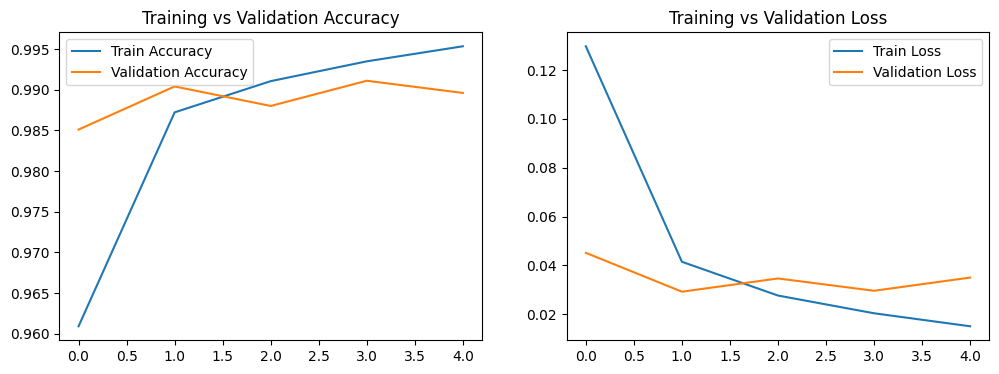

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define a basic CNN model
def build_basic_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile and train the model
basic_cnn = build_basic_cnn()
basic_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = basic_cnn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = basic_cnn.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training vs validation accuracy/loss
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Training vs Validation Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Training vs Validation Loss')
ax[1].legend()
plt.show()


# 3b. Enhancing the CNN model using regularization and batch normalization


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.9087 - loss: 0.2961 - val_accuracy: 0.9843 - val_loss: 0.0500
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9862 - loss: 0.0460 - val_accuracy: 0.9920 - val_loss: 0.0281
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9913 - loss: 0.0276 - val_accuracy: 0.9874 - val_loss: 0.0341
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9932 - loss: 0.0201 - val_accuracy: 0.9911 - val_loss: 0.0294
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9960 - loss: 0.0123 - val_accuracy: 0.9922 - val_loss: 0.0280
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 108s 55ms/step - accuracy: 0.8337 - loss: 1.9166 - val_accuracy: 0.9776 - val_loss: 0.4143
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 105s 56ms/step - accuracy: 0.9477 - loss: 0.5128 - val_accuracy: 0.9813 - val_loss: 0.3849
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 137s 54ms/step - accuracy: 0.9517 - l

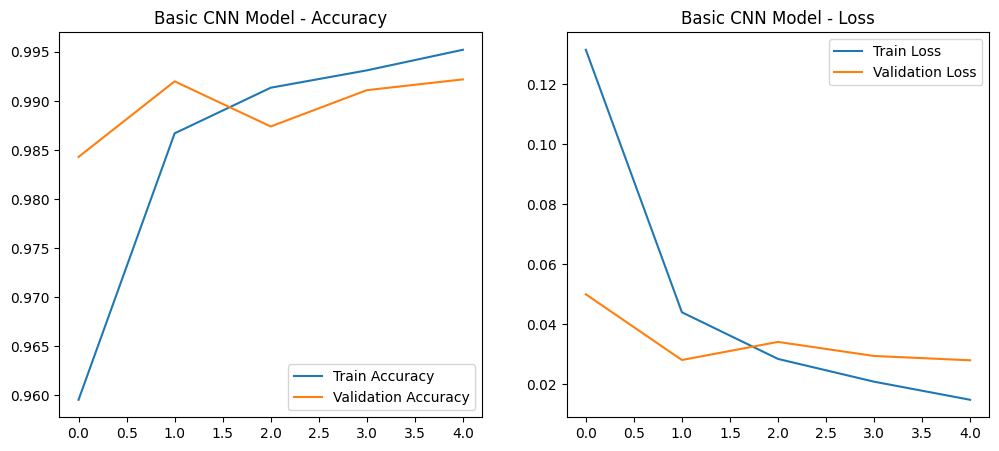

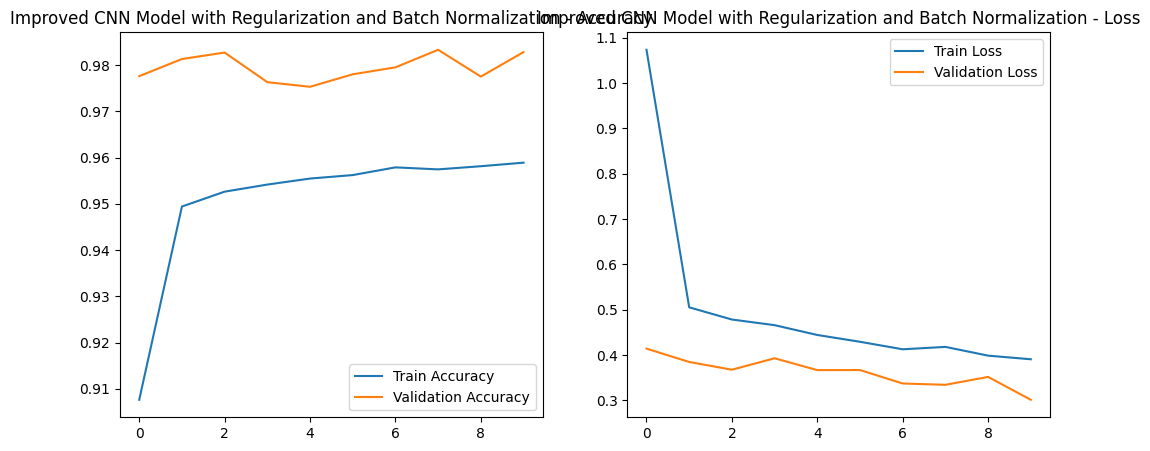

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the basic CNN model
def build_basic_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile and train the basic model
basic_model = build_basic_cnn()
basic_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_basic = basic_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Define the improved CNN model with L2 regularization, dropout, and batch normalization
def build_improved_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(28,28,1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile and train the improved model
improved_model = build_improved_cnn()
improved_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_improved = improved_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Function to plot accuracy and loss

def plot_performance(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

# Plot performance for both models
plot_performance(history_basic, "Basic CNN Model")
plot_performance(history_improved, "Improved CNN Model with Regularization and Batch Normalization")
